In [1]:
import sys
import os
sys.path.append("/mnt/brain5/scratch/wcarvalh/projects/rljax/")
print("Started")
print(os.getcwd())

Started
/mnt/brain5/scratch/wcarvalh/projects/rljax/analysis/final


In [2]:
from IPython.display import display, HTML

from vistools.tensorboard_data import TensorboardData
from vistools.tensorboard_vistools import Vistool, PanelTool


%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/wcarvalh/miniconda3/envs/acmejax/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
basepath="/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/"

run_data = TensorboardData(
    search_paths=None,
    search_kwargs=dict(
        basepath=basepath,
        njobs=1,
        verbose=1,
    )
)

In [4]:
run_data.load_paths(
    search_paths=[
        # e.g. goto_avoid/settings/seed
        "norespawn_baselines/*/*",
    ],
    config_file='config.json',
)
run_data.load_settings(config_search='config.json')
run_data.settings_df

get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/norespawn_baselines/*/*


/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/norespawn_baselines/*/*: 12


loaded: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 47038.92it/s]

Added: 3


,path,fullpath,experiment_settings,experiment_settings_seed,batch_size,multihead,loss_coeff,num_parallel_calls,replay_table_name,npolicies,...,learning_rate,store_lstm_state,agent,concat_w,variance,samples_per_insert,bootstrap_n,cumulant_hidden_size,state_hidden_size,seed
0,"norespawn_baselines/agent=r2d1,setting=large,e...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"norespawn_baselines,agent=r2d1,setting=large,e...","norespawn_baselines,agent=r2d1,setting=large,e...",32,None,1.0,1,priority_table,NaN,...,0.001,True,r2d1,None,NaN,0.0,5,NaN,NaN,1
1,"norespawn_baselines/agent=r2d1_noise_eval,sett...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"norespawn_baselines,agent=r2d1_noise_eval,sett...","norespawn_baselines,agent=r2d1_noise_eval,sett...",32,None,1.0,1,priority_table,NaN,...,0.001,True,r2d1_noise_eval,None,0.5,0.0,5,NaN,NaN,1
2,"norespawn_baselines/agent=usfa,setting=large,e...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"norespawn_baselines,agent=usfa,setting=large,e...","norespawn_baselines,agent=usfa,setting=large,e...",32,False,1.0,1,priority_table,10.0,...,0.001,True,usfa,False,0.5,0.0,5,128.0,0.0,1


In [5]:
run_data.load_tensorboard(
    njobs=8,
    key_filter=lambda k: 'steps' in k.lower() or 'EpisodeReturn' in k,
    load_paths=True,
)

get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/norespawn_baselines/*/*


/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/norespawn_baselines/*/*: 12


loaded: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 65450.78it/s]


Added: 0


settings: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:51<00:00, 17.01s/it]

Keys:
['r2d1/EvaluatorSteps',
 'r2d1/ActorSteps',
 'r2d1/LearnerSteps',
 'r2d1/StepsPerSecond',
 'actor/0.Task/0,0,0,1/EpisodeReturn',
 'actor/StepsPerSecond',
 'actor/0.Task/0,0,1,0/EpisodeReturn',
 'actor/EvaluatorSteps',
 'actor/0.Task/1,0,0,0/EpisodeReturn',
 'actor/0.Task/0,1,0,0/EpisodeReturn',
 'actor/LearnerSteps',
 'evaluator/0.Task/1,1,0,0/EpisodeReturn',
 'evaluator/StepsPerSecond',
 'evaluator/ActorSteps',
 'evaluator/0.Task/-1,1,0,1/EpisodeReturn',
 'evaluator/0.Task/0,0,1,0/EpisodeReturn',
 'evaluator/0.Task/-1,1,-1,1/EpisodeReturn',
 'evaluator/0.Task/1,1,1,1/EpisodeReturn',
 'evaluator/0.Task/0,1,0,0/EpisodeReturn',
 'evaluator/0.Task/1,0,0,0/EpisodeReturn',
 'evaluator/0.Task/0,0,0,1/EpisodeReturn',
 'evaluator/LearnerSteps',
 'usfa/StepsPerSecond',
 'usfa/LearnerSteps',
 'usfa/ActorSteps',
 'usfa/EvaluatorSteps']


In [6]:
key_with_legend = '1,1,0,0'
filter_key =  '-1,1,-1,1'

vis_tool = Vistool(
    tensorboard_data=run_data,
    key_with_legend=f'evaluator/0.Task/{key_with_legend}/EpisodeReturn',
    filter_key=f'evaluator/0.Task/{filter_key}/EpisodeReturn',
    filter_column='mean',
    # plot_data_kwargs=dict(xlabel_key=steps_key),
    plot_settings=
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (train)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,0,0,0', '0,1,0,0', '0,0,1,0', '0,0,0,1']
    ] +
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (eval)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,1,0,0', '1,1,1,1', '-1,1,0,1', '-1,1,-1,1']
        # for key in ['1,1,1,1','-1,1,-1,1']
    ],
)

# Replicate

No Matches for {'agent': 'r2d1_no_task'}


,num_seeds
0,4
1,4
2,4


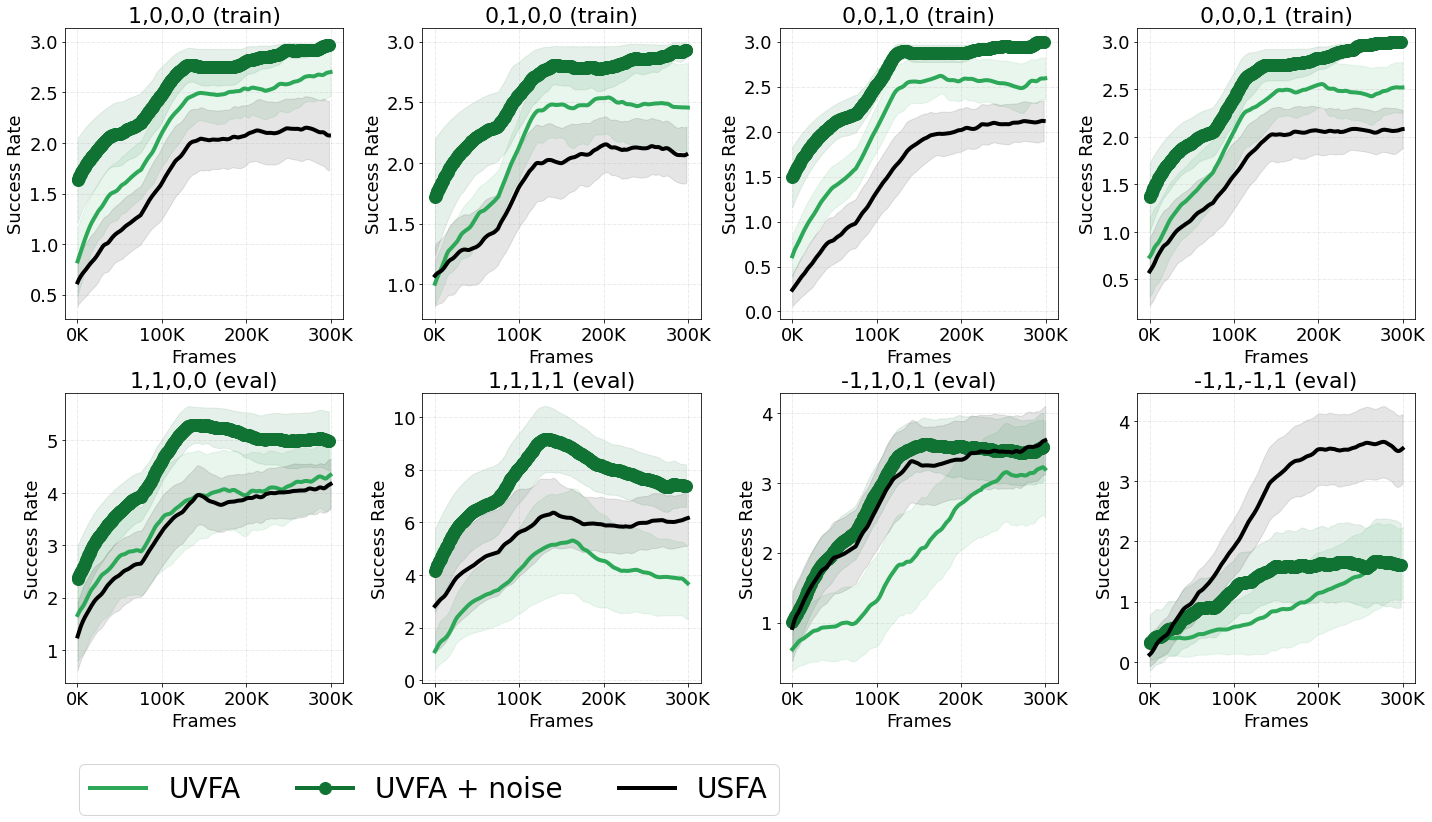

In [7]:
# %debug
vis_tool.plot_filters(
    topk=1,
    # legend_kwargs="right",
    maxcols=4,
    data_filters=[
        dict(
            settings=dict(agent='r2d1'),
            label='UVFA',
            color='light_green',
        ),
        dict(
            settings=dict(agent='r2d1_noise_eval'),
            label='UVFA + noise',
            color='dark_green',
            marker='o',
        ),
        dict(
            settings=dict(agent='r2d1_no_task'),
            label='UVFA + no task (R2D2)',
            color='orange',
            linestyle='--',
        ),
        dict(
            settings=dict(agent='usfa'),
            label='USFA',
            color='black',
        ),
    ],
    plot_data_kwargs=dict(xlabel_key='evaluator/ActorSteps',
                          xmax=300e3,
                          n_samples=400,
                          rolling=200,
                          std_alpha=.1,
                          err_fn=lambda h: h.grouped.sem(),
                          err_style='fill'),
    subplot_kwargs=dict(unit=5),
    fig_kwargs=dict(legend_text_size=28),
    legend_kwargs=dict(
            loc='lower left',
            bbox_to_anchor=(0,-.5), 
            ncol=4,
            ),
)

# Takeaway
- UVFA noise doesn't generalize
- UVFA w/ noise gets some of generalization of USFA
- UVFA w/o task gets similar additive generalization, but doesn't generalize avoidance (though noise gets this)